In [489]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
pd.options.display.float_format = "{:.2f}".format
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [490]:
# Load application data
loan_appl_data = pd.read_csv("application_data.csv")

# 1. Data Inspection

In [491]:
# Display basic information about the dataframe
loan_appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [492]:
loan_appl_data.shape

(307511, 122)

In [493]:
loan_appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

# 2. Data Cleaning

In [494]:
def null_p(x):
    return round(100*(x.isnull().sum()/len(x.index)),2)

In [495]:
# 2.1 To clean the data, first we'll calculate the percentage of null values in each column
cleaning_null = pd.DataFrame({'Name':loan_appl_data.columns,'Null_Percentage':null_p(loan_appl_data)})
cleaning_null.set_index("Name").sort_values(by= 'Null_Percentage',ascending=False)

,Null_Percentage
Name,
COMMONAREA_MEDI,69.87
COMMONAREA_AVG,69.87
COMMONAREA_MODE,69.87
NONLIVINGAPARTMENTS_MODE,69.43
NONLIVINGAPARTMENTS_AVG,69.43
NONLIVINGAPARTMENTS_MEDI,69.43
FONDKAPREMONT_MODE,68.39
LIVINGAPARTMENTS_MODE,68.35
LIVINGAPARTMENTS_AVG,68.35


# To maintain the quality of our data set, we will drop all the columns with higher than 32% null values


In [496]:
drop_columns = list(cleaning_null.loc[cleaning_null.Null_Percentage>=32]["Name"])
loan_appl_data = loan_appl_data.drop(drop_columns ,axis=1)
null_p(loan_appl_data).sort_values(ascending=False)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
FLAG_DOCUMENT_7                0.00
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3                0.00
FLAG_DOCUMENT_4                0.00
FLAG_DOCUMENT_5                0.00
FLAG_DOCUMENT_6                0.00
FLAG_DOCUMENT_11               0.00
FLAG_DOCUMENT_8                0.00
FLAG_DOCUMENT_9                0.00
FLAG_DOCUMENT_10               0.00
LIVE_CITY_NOT_WORK_CITY        0.00
FLAG_DOCUMENT_12            

In [497]:
loan_appl_data.shape

(307511, 73)

In [498]:
#Cleaning the unrequired columns
loan_appl_data = loan_appl_data.drop([ 'WEEKDAY_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','EXT_SOURCE_3','NAME_TYPE_SUITE','HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_WEEK', 'OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DEF_30_CNT_SOCIAL_CIRCLE', 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','DAYS_LAST_PHONE_CHANGE'],axis=1)

In [499]:
loan_appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,-16037.00,63815.05,-2994.20,1.00,2.15,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,4363.99,141275.77,1509.45,0.00,0.91,0.01,0.45,0.01,0.12,0.28,0.01,0.27,0.06,0.00,0.06,0.00,0.06,0.05,0.03,0.10,0.02,0.09,0.02,0.02,0.02,0.92,0.79,1.87
min,100002.00,0.00,0.00,25650.00,45000.00,1615.50,40500.00,-25229.00,-17912.00,-7197.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,189145.50,0.00,0.00,112500.00,270000.00,16524.00,238500.00,-19682.00,-2760.00,-4299.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,278202.00,0.00,0.00,147150.00,513531.00,24903.00,450000.00,-15750.00,-1213.00,-3254.00,1.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,367142.50,0.00,1.00,202500.00,808650.00,34596.00,679500.00,-12413.00,-289.00,-1720.00,1.00,3.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,456255.00,1.00,19.00,117000000.00,4050000.00,258025.50,4050000.00,-7489.00,365243.00,0.00,1.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,27.00,261.00,25.00


In [500]:
loan_appl_data.shape

(307511, 45)

In [501]:
# With 20 individual columns for 20 distinct documents, we'll aggregate and merge them into a single column

In [502]:
loan_appl_data['AGGREGATE_DOC_RESULT'] = loan_appl_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].mean(axis=1)
loan_appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGGREGATE_DOC_RESULT
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-2120,1,Laborers,1.00,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,1.00,0.05
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,-16765,-1188,-291,1,Core staff,2.00,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.05
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-2531,1,Laborers,1.00,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-2437,1,Laborers,2.00,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.05
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-3458,1,Core staff,1.00,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.05


In [503]:
drop_columns = loan_appl_data.loc[:, 'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns
loan_appl_data.drop(columns=drop_columns, inplace=True)
loan_appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGGREGATE_DOC_RESULT
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-2120,1,Laborers,1.00,Business Entity Type 3,0.00,0.00,1.00,0.05
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,-16765,-1188,-291,1,Core staff,2.00,School,0.00,0.00,0.00,0.05
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-2531,1,Laborers,1.00,Government,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-2437,1,Laborers,2.00,Business Entity Type 3,NaN,NaN,NaN,0.05
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-3458,1,Core staff,1.00,Religion,0.00,0.00,0.00,0.05


In [504]:
loan_appl_data.shape

(307511, 26)

<Axes: ylabel='Frequency'>

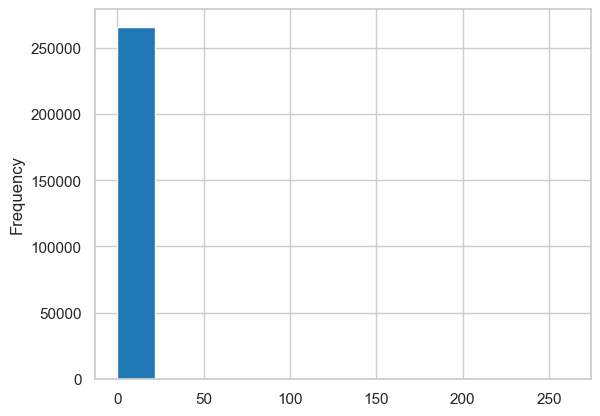

In [505]:
#We'll plot historam
num_unique_values =  len(loan_appl_data.AMT_REQ_CREDIT_BUREAU_QRT.unique())
loan_appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins = num_unique_values)

In [506]:
loan_appl_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.00      215417
1.00       33862
2.00       14412
3.00        1717
4.00         476
5.00          64
6.00          28
8.00           7
7.00           7
261.00         1
19.00          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [507]:
loan_appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0   0.00
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [508]:
# Treatment: AMT_REQ_CREDIT_BUREAU_YEAR

In [509]:
loan_appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].head(10)

0   1.00
1   0.00
2   0.00
3    NaN
4   0.00
5   1.00
6   2.00
7   0.00
8   1.00
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [510]:
# Now let's make histogram to visualise

<Axes: ylabel='Frequency'>

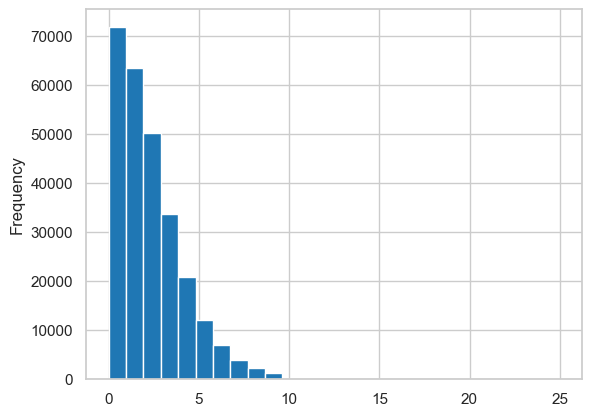

In [511]:
unique_values =  len(loan_appl_data.AMT_REQ_CREDIT_BUREAU_YEAR.unique())
loan_appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins = unique_values)

In [512]:
# A the values are integers, we'll use mode

In [513]:
loan_appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0   0.00
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

# The columns 'AMT_REQ_CREDIT_BUREAU_QRT', AMT_REQ_CREDIT_BUREAU_MON', and 'AMT_GOODS_PRICE' contain data that is present in over 87% of the entries. 

### In cases where the columns 'AMT_REQ_CREDIT_BUREAU_QRT' and 'AMT_REQ_CREDIT_BUREAU_MON' exhibit categorical data, the most suitable approach to replace missing values is by using the mode since these columns fall under the categorical domain. On the other hand, for the column 'AMT_GOODS_PRICE', which represents a continuous variable, replacing missing values with the median is a more appropriate choice compared to the mean, as it offers a more insightful representation.

In [514]:
missing_counts = loan_appl_data.isnull().sum()
missing_counts_sorted = missing_counts.sort_values(ascending=False)
print(missing_counts_sorted)

OCCUPATION_TYPE               96391
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
SK_ID_CURR                        0
NAME_HOUSING_TYPE                 0
ORGANIZATION_TYPE                 0
FLAG_MOBIL                        0
DAYS_ID_PUBLISH                   0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
NAME_FAMILY_STATUS                0
TARGET                            0
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE                  0
AMT_CREDIT                        0
AMT_INCOME_TOTAL                  0
CNT_CHILDREN                      0
FLAG_OWN_REALTY                   0
FLAG_OWN_CAR                      0
CODE_GENDER                       0
NAME_CONTRACT_TYPE                0
AGGREGATE_DOC_RESULT              0
dtype: int64


In [515]:
drop_cn = ["AMT_ANNUITY", "CNT_FAM_MEMBERS"]
loan_appl_data = loan_appl_data[loan_appl_data[drop_cn].notna().all(axis=1)]

In [516]:
loan_appl_data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE               96391
AMT_REQ_CREDIT_BUREAU_YEAR    41517
AMT_REQ_CREDIT_BUREAU_QRT     41517
AMT_REQ_CREDIT_BUREAU_MON     41517
AMT_GOODS_PRICE                 276
SK_ID_CURR                        0
NAME_HOUSING_TYPE                 0
ORGANIZATION_TYPE                 0
CNT_FAM_MEMBERS                   0
FLAG_MOBIL                        0
DAYS_ID_PUBLISH                   0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
NAME_FAMILY_STATUS                0
TARGET                            0
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE                  0
AMT_ANNUITY                       0
AMT_CREDIT                        0
AMT_INCOME_TOTAL                  0
CNT_CHILDREN                      0
FLAG_OWN_REALTY                   0
FLAG_OWN_CAR                      0
CODE_GENDER                       0
NAME_CONTRACT_TYPE                0
AGGREGATE_DOC_RESULT              0
dtype: int64

In [517]:
### Now let's check the data type of the remaining data

In [518]:
data_types = loan_appl_data.dtypes
print(data_types)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
ORGANIZATION_TYPE              object
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
AGGREGATE_DOC_RESULT          float64
dtype: objec

In [519]:
# Now, we'll convert the data types

In [520]:
loan_appl_data["AMT_REQ_CREDIT_BUREAU_MON"] = loan_appl_data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(-1).astype(int).astype(str)
loan_appl_data["AMT_REQ_CREDIT_BUREAU_MON"].replace('-1', np.nan, inplace=True)

In [521]:
loan_appl_data["AMT_REQ_CREDIT_BUREAU_QRT"] = loan_appl_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(-1).astype(int).astype(str)
loan_appl_data["AMT_REQ_CREDIT_BUREAU_QRT"].replace('-1', np.nan, inplace=True)

In [522]:
loan_appl_data["AMT_REQ_CREDIT_BUREAU_YEAR"] = loan_appl_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(-1).astype(int).astype(str)
loan_appl_data["AMT_REQ_CREDIT_BUREAU_YEAR"].replace('-1', np.nan, inplace=True)

In [523]:
loan_appl_data["CNT_FAM_MEMBERS"]=loan_appl_data["CNT_FAM_MEMBERS"].astype("int64")

In [524]:
loan_appl_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS                 int64
ORGANIZATION_TYPE              object
AMT_REQ_CREDIT_BUREAU_MON      object
AMT_REQ_CREDIT_BUREAU_QRT      object
AMT_REQ_CREDIT_BUREAU_YEAR     object
AGGREGATE_DOC_RESULT          float64
dtype: objec

In [525]:
### Now we'll convert the negative days values to years

In [526]:
day_conversion = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_ID_PUBLISH"]
loan_appl_data[day_conversion] = loan_appl_data[day_conversion].div(-365).round(2).abs()

In [527]:
loan_appl_data.rename(columns = {'DAYS_BIRTH':'YEARS_BIRTH', 'DAYS_EMPLOYED':'YEARS_EMPLOYED', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace = True)

In [528]:
loan_appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGGREGATE_DOC_RESULT
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,5.81,1,Laborers,1,Business Entity Type 3,0,0,1,0.05
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0,0.05
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,6.93,1,Laborers,1,Government,0,0,0,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,52.07,8.33,6.68,1,Laborers,2,Business Entity Type 3,NaN,NaN,NaN,0.05
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Working,Secondary / secondary special,Single / not married,House / apartment,54.61,8.32,9.47,1,Core staff,1,Religion,0,0,0,0.05


# Outlier treatment

In [529]:
# Outlier treatment: AMT_INCOME_TOTAL

In [530]:
loan_appl_data['AMT_INCOME_TOTAL'].describe()

count      307497.00
mean       168796.21
std        237127.59
min         25650.00
25%        112500.00
50%        146812.50
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

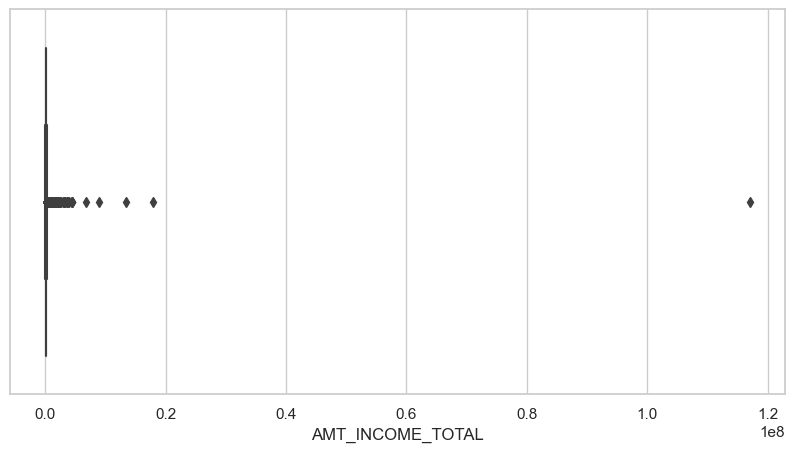

In [531]:
plt.figure(figsize=[10, 5])
sns.boxplot(x=loan_appl_data['AMT_INCOME_TOTAL'], orient='h')
plt.show()

In [532]:
loan_appl_data.AMT_INCOME_TOTAL.quantile([0.5,0.75,0.8,0.95,0.99,0.995,0.999,0.9999,1])

0.50      146812.50
0.75      202500.00
0.80      225000.00
0.95      337500.00
0.99      472500.00
0.99      630000.00
1.00      900000.00
1.00     2250000.00
1.00   117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [533]:
loan_appl_data[loan_appl_data['AMT_INCOME_TOTAL']>15000000].shape

(2, 26)

In [534]:
# In the case of the 'AMT_INCOME_TOTAL' column, values that surpass 15,000,000 are classified as outliers. Therefore, replace these outliers with the median value (146,812.5.) of the column 

In [535]:
# Outliers treatment: CNT_CHILDREN

In [536]:
loan_appl_data['CNT_CHILDREN'].value_counts().sort_index(ascending=False)

19         2
14         3
12         2
11         1
10         2
9          2
8          2
7          7
6         21
5         84
4        429
3       3717
2      26749
1      61119
0     215357
Name: CNT_CHILDREN, dtype: int64

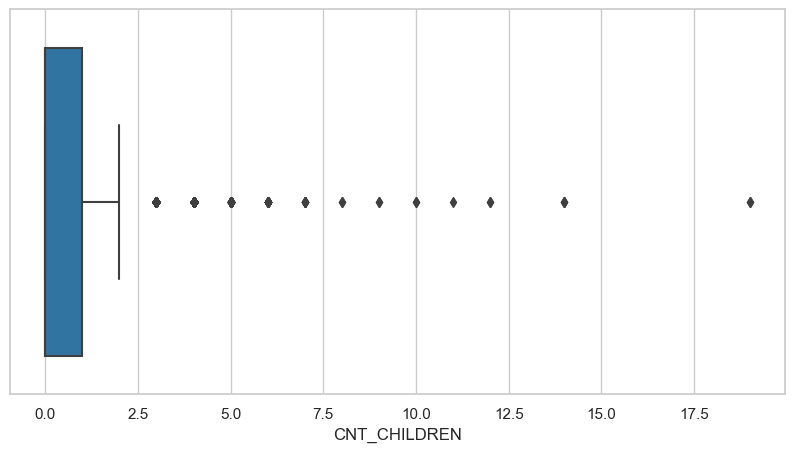

In [537]:
plt.figure(figsize=[10, 5])
sns.boxplot(x=loan_appl_data['CNT_CHILDREN'], orient='h')
plt.show()

In [538]:
loan_appl_data[loan_appl_data['CNT_CHILDREN']>12.5].shape

(5, 26)

In [539]:
loan_appl_data['CNT_CHILDREN'].mode()

0    0
Name: CNT_CHILDREN, dtype: int64

In [540]:
# values 14, 19 are outliers, we'll replace the values with mode(0)

In [541]:
#Outlier treatment: AMT_CREDIT

In [542]:
loan_appl_data['AMT_CREDIT'].describe()

count    307497.00
mean     599027.09
std      402493.95
min       45000.00
25%      270000.00
50%      513531.00
75%      808650.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

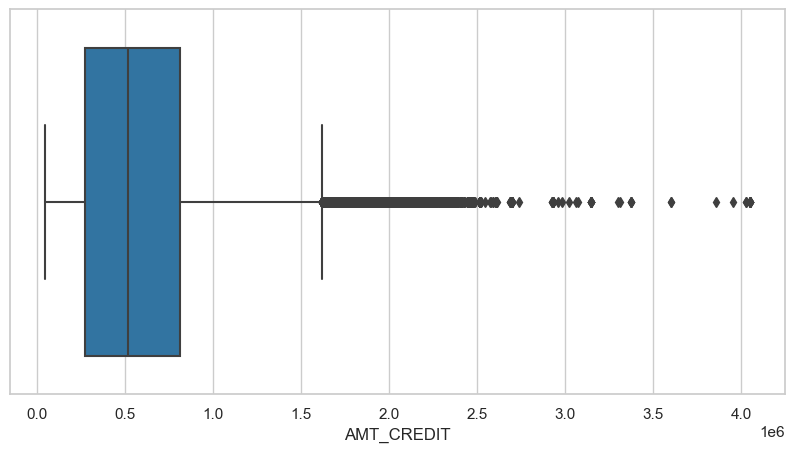

In [543]:
plt.figure(figsize=[10, 5])
sns.boxplot(x=loan_appl_data['AMT_CREDIT'], orient='h')
plt.show()

In [544]:
loan_appl_data['AMT_CREDIT'].quantile(([0.5,0.7,0.9,0.95,0.99,0.995,0.999,0.9999]))

0.50    513531.00
0.70    755190.00
0.90   1133748.00
0.95   1350000.00
0.99   1854020.16
0.99   2022565.50
1.00   2517300.00
1.00   3030585.70
Name: AMT_CREDIT, dtype: float64

In [545]:
# Values above 3500000 are outliers, hence, will be replaced with median (513531.00)

In [546]:
#Outlier treatment: YEARS_EMPLOYED

In [547]:
loan_appl_data['YEARS_EMPLOYED'].describe()

count   307497.00
mean       185.56
std        382.05
min          0.00
25%          2.56
50%          6.08
75%         15.64
max       1000.67
Name: YEARS_EMPLOYED, dtype: float64

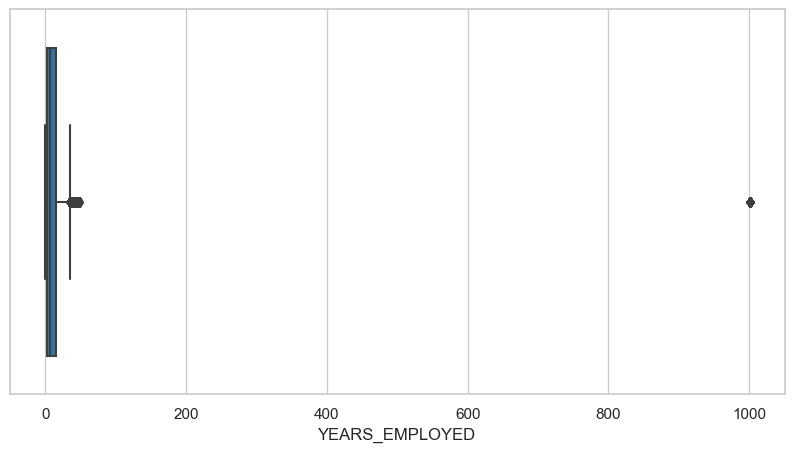

In [548]:
plt.figure(figsize=[10, 5])
sns.boxplot(x=loan_appl_data['YEARS_EMPLOYED'], orient='h')
plt.show()

In [549]:
loan_appl_data['YEARS_EMPLOYED'].quantile(([0.5,0.7,0.8,0.85,0.9,0.95,0.99,0.999]))

0.50      6.08
0.70     12.15
0.80     25.18
0.85   1000.67
0.90   1000.67
0.95   1000.67
0.99   1000.67
1.00   1000.67
Name: YEARS_EMPLOYED, dtype: float64

In [550]:
loan_appl_data[loan_appl_data['YEARS_EMPLOYED']>60].shape

(55374, 26)

In [551]:
loan_appl_data['YEARS_EMPLOYED'].median()

6.08

In [552]:
# We'll replace above 60 values as they are outliers, with median (6.08)

In [553]:
loan_appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count     265980
unique        11
top            0
freq      215408
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: object

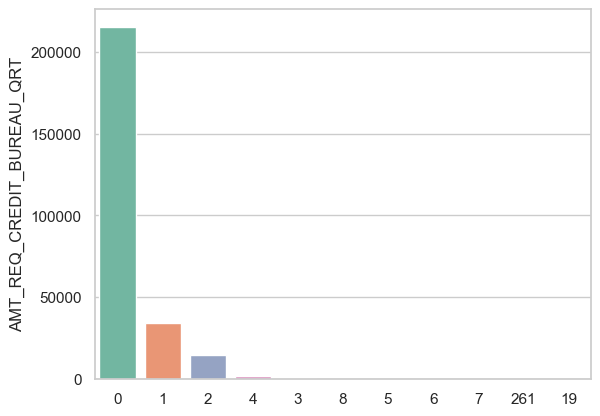

In [554]:
value = np.array(pd.Series(loan_appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].unique()).dropna())
sns.barplot(x=value, y=loan_appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(), palette="Set2")
plt.show()

In [555]:
loan_appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].unique()

array(['0', nan, '1', '2', '4', '3', '8', '5', '6', '7', '261', '19'],
      dtype=object)

In [556]:
loan_appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]

'0'

In [557]:
# 261, 19 are outliers, hence will be replace by mode of column = 0 

# Binning 

In [558]:
# Now we'll perform binning to group continuous variable's values into discrete intervals or "bins."

In [559]:
# Binning: 'YEARS_EMPLOYED'

In [560]:
loan_appl_data['Experience_Slab'] = pd.cut(loan_appl_data['YEARS_EMPLOYED'], [0,10,20,30,40,50,9999], labels=['0-10','10-20','20-30', '30-40', '40-50', '50+'])

In [561]:
# Binning: 'YEARS_BIRTH'

In [562]:
loan_appl_data['Applicant_AgeGroup'] = pd.cut(loan_appl_data.YEARS_BIRTH,[0,20,30,40,50,60,9999],labels=['0-20','20-30', '30-40', '40-50', '50-60', '60+'])

In [563]:
# Binning: 'AMT_INCOME_TOTAL'

In [564]:
loan_appl_data['IncomeSlab'] = pd.cut(loan_appl_data.AMT_INCOME_TOTAL,[20000, 300000, 1200000, 2000000, 100000000], labels = ['Low', 'Medium', 'High','Very High'])

In [565]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

loan_appl_data['AMT_CREDIT'] = pd.cut(loan_appl_data['AMT_CREDIT'], bins = bins, labels=slots)

In [566]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

loan_appl_data['AMT_GOODS_PRICE'] = pd.cut(loan_appl_data['AMT_GOODS_PRICE'], bins = bins, labels=slots)

In [567]:
loan_appl_data.AMT_GOODS_PRICE.head()

0       300000-400000
1    500000 and above
2       100000-200000
3       200000-300000
4    500000 and above
Name: AMT_GOODS_PRICE, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

In [568]:
loan_appl_data.AMT_CREDIT.head()

0       400000-500000
1    500000 and above
2       100000-200000
3       300000-400000
4    500000 and above
Name: AMT_CREDIT, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

In [569]:
loan_appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGGREGATE_DOC_RESULT,Experience_Slab,Applicant_AgeGroup,IncomeSlab
0,100002,1,Cash loans,M,N,Y,0,202500.00,400000-500000,24700.50,300000-400000,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,5.81,1,Laborers,1,Business Entity Type 3,0,0,1,0.05,0-10,20-30,Low
1,100003,0,Cash loans,F,N,N,0,270000.00,500000 and above,35698.50,500000 and above,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0,0.05,0-10,40-50,Low
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,100000-200000,6750.00,100000-200000,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,6.93,1,Laborers,1,Government,0,0,0,0.00,0-10,50-60,Low
3,100006,0,Cash loans,F,N,Y,0,135000.00,300000-400000,29686.50,200000-300000,Working,Secondary / secondary special,Civil marriage,House / apartment,52.07,8.33,6.68,1,Laborers,2,Business Entity Type 3,NaN,NaN,NaN,0.05,0-10,50-60,Low
4,100007,0,Cash loans,M,N,Y,0,121500.00,500000 and above,21865.50,500000 and above,Working,Secondary / secondary special,Single / not married,House / apartment,54.61,8.32,9.47,1,Core staff,1,Religion,0,0,0,0.05,0-10,50-60,Low


In [570]:
### Target

In [571]:
loan_appl_data.TARGET.value_counts(normalize=True)*100

0   91.93
1    8.07
Name: TARGET, dtype: float64

In [572]:
# Out of all the loan applicants, there is a 91.93% higher likelihood that those who apply for the loan will make timely payments compared to those who default.

In [573]:
# Target treatment

In [574]:
grouped_data = loan_appl_data.groupby('TARGET')
target_1 = grouped_data.get_group(1)
target_0 = grouped_data.get_group(0)

## Univariate analysis

In [576]:
loan_appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGGREGATE_DOC_RESULT,Experience_Slab,Applicant_AgeGroup,IncomeSlab
0,100002,1,Cash loans,M,N,Y,0,202500.00,400000-500000,24700.50,300000-400000,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,5.81,1,Laborers,1,Business Entity Type 3,0,0,1,0.05,0-10,20-30,Low
1,100003,0,Cash loans,F,N,N,0,270000.00,500000 and above,35698.50,500000 and above,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0,0.05,0-10,40-50,Low
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,100000-200000,6750.00,100000-200000,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,6.93,1,Laborers,1,Government,0,0,0,0.00,0-10,50-60,Low
3,100006,0,Cash loans,F,N,Y,0,135000.00,300000-400000,29686.50,200000-300000,Working,Secondary / secondary special,Civil marriage,House / apartment,52.07,8.33,6.68,1,Laborers,2,Business Entity Type 3,NaN,NaN,NaN,0.05,0-10,50-60,Low
4,100007,0,Cash loans,M,N,Y,0,121500.00,500000 and above,21865.50,500000 and above,Working,Secondary / secondary special,Single / not married,House / apartment,54.61,8.32,9.47,1,Core staff,1,Religion,0,0,0,0.05,0-10,50-60,Low


In [577]:
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.rcParams["axes.labelsize"] = 9
plt.rcParams['axes.titlesize'] = 9
plt.rcParams['axes.titlepad'] = 12

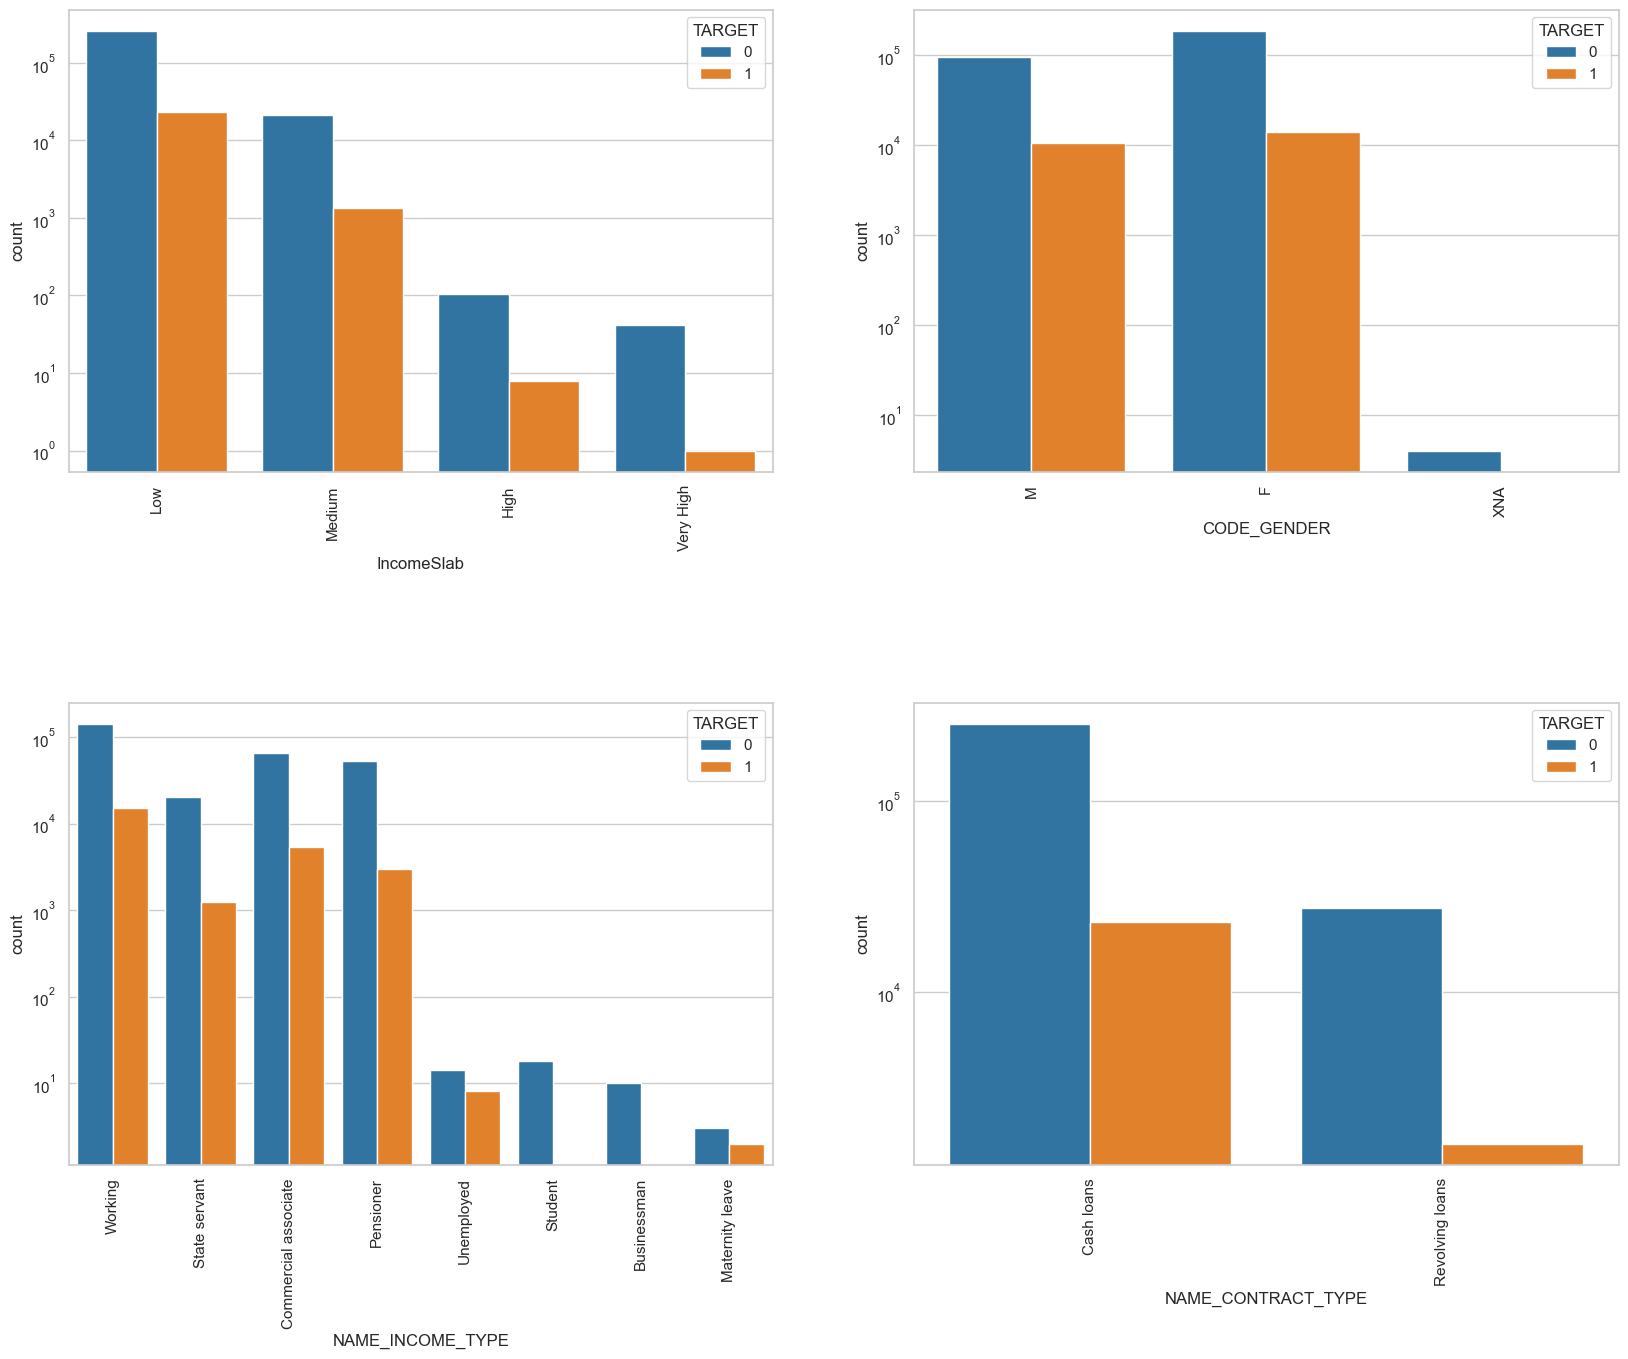

In [578]:
flow = ['IncomeSlab','CODE_GENDER', 'NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
plt.figure(figsize = (20, 15))

for i in enumerate(flow):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = loan_appl_data)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 90)
    plt.yscale('log')

#Observations:

IncomeSlab:
-People in low income range have high number of loan and also have high in defaulter
-Income segment very high has less defaulter.

CODE_GENDER:
-The % of defaulters are more in Male than Female

NAME_INCOME_TYPE:
- Student and business are higher in percentage of loan repayment.
- Working, State servent and Commercial associates are higher in default percentage.
- Maternity category is significantly higher problem in repayment.

NAME_CONTRACT_TYPE:
- For contract type ‘Cash loans’ are high in number of credits than ‘Revolving loans’ contract type.
- By above graph 'Revolving loans' is small amount compared to ‘Cash loans’ 

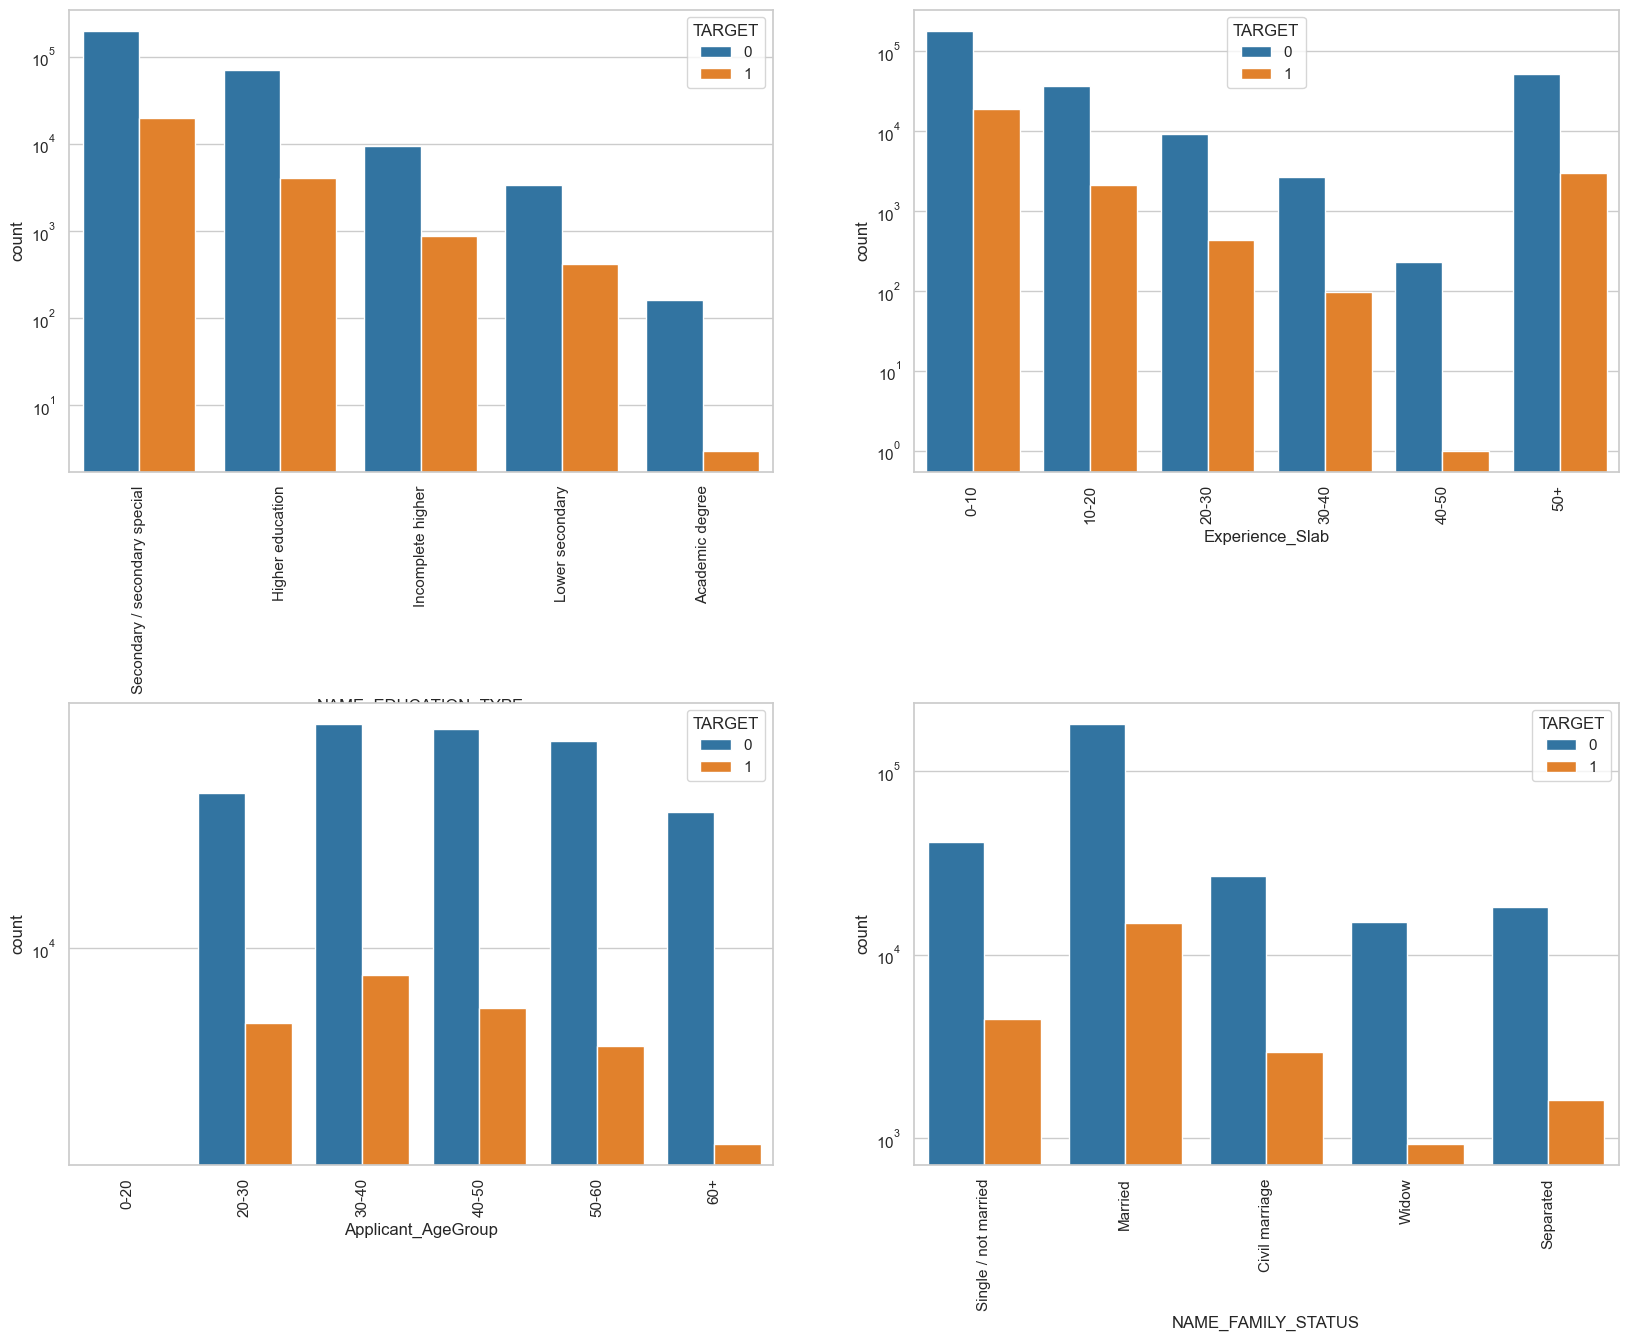

In [579]:
flow = ['NAME_EDUCATION_TYPE','Experience_Slab', 'Applicant_AgeGroup','NAME_FAMILY_STATUS']
plt.figure(figsize = (20, 15))

for i in enumerate(flow):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = loan_appl_data)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 90)
    plt.yscale('log')

Applicants who possess a Secondary Education are the most numerous in terms of loan uptake, surpassing 200,000 loans. Following closely are those with Higher Education. Conversely, candidates holding an Academic Degree represent the smallest fraction of loan applicants. Despite their relatively lower frequency in loan applications, individuals with lower educational backgrounds have the highest default rate, reaching around 11%. In contrast, applicants with an Academic Degree exhibit the lowest default rate, which is less than 2%.

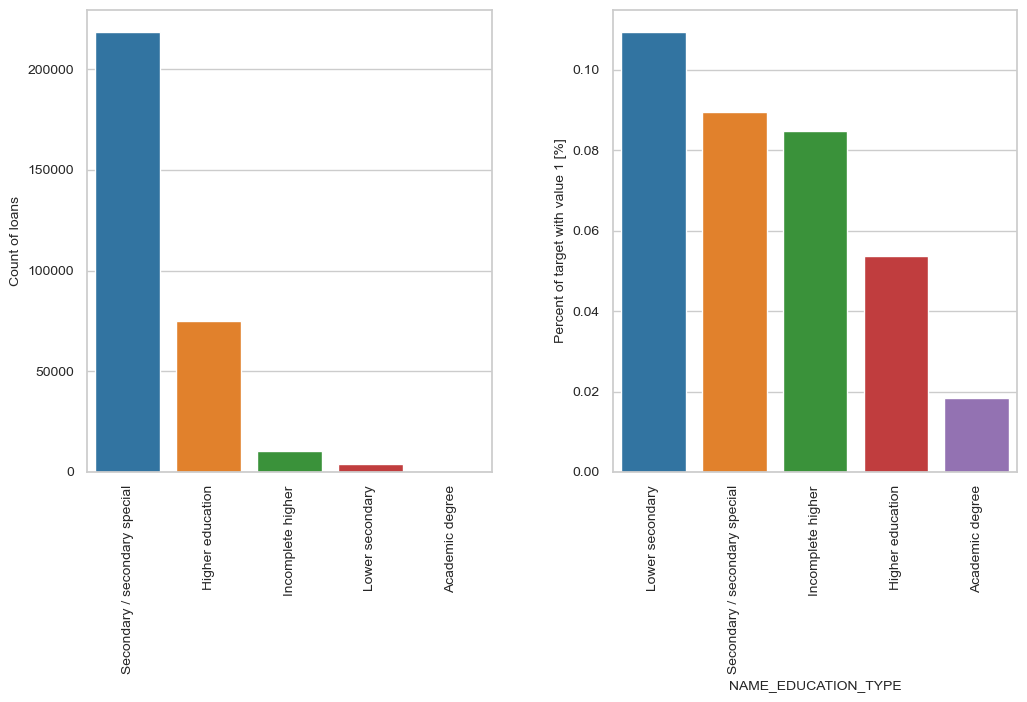

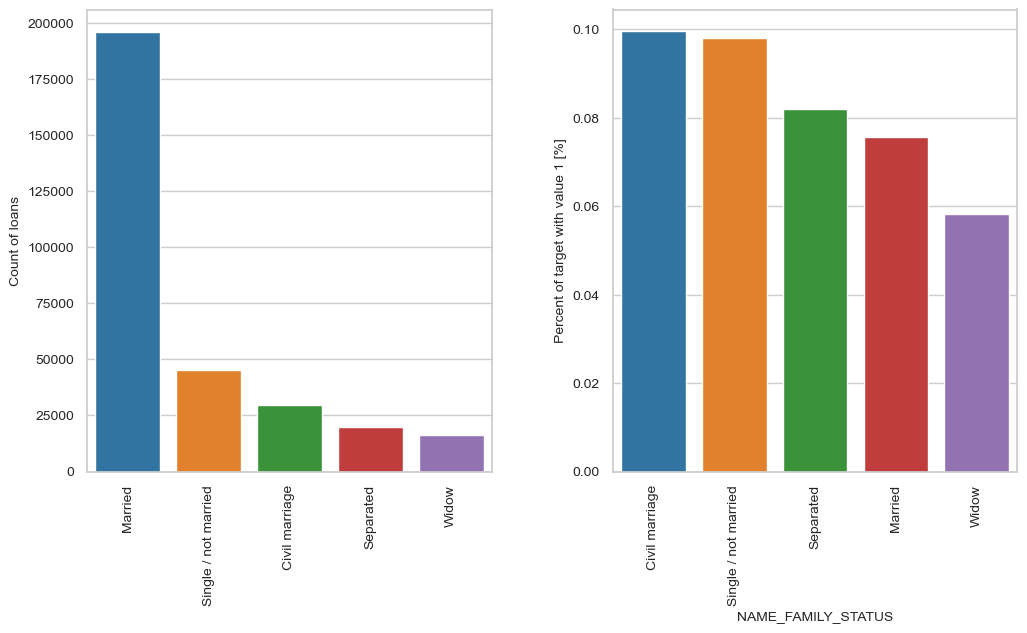

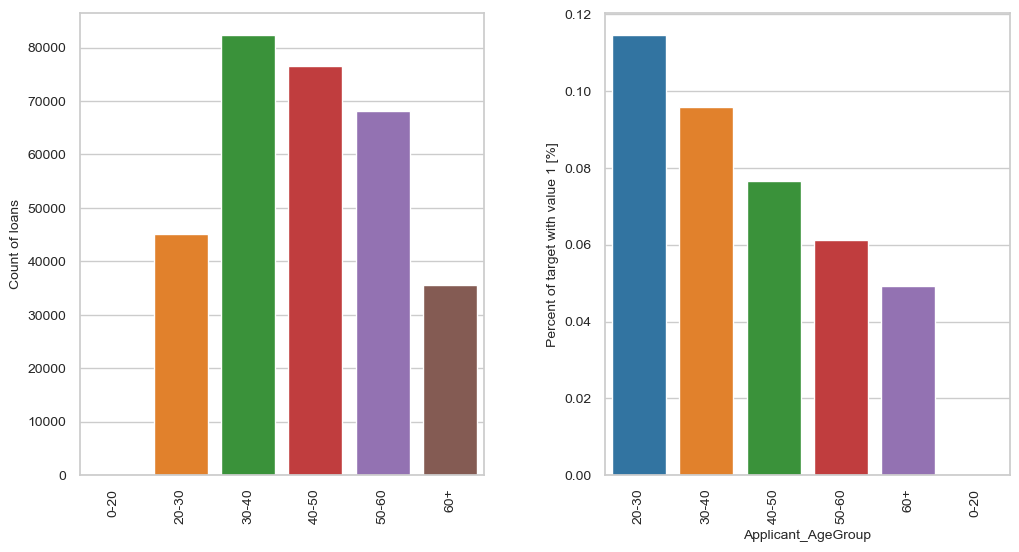

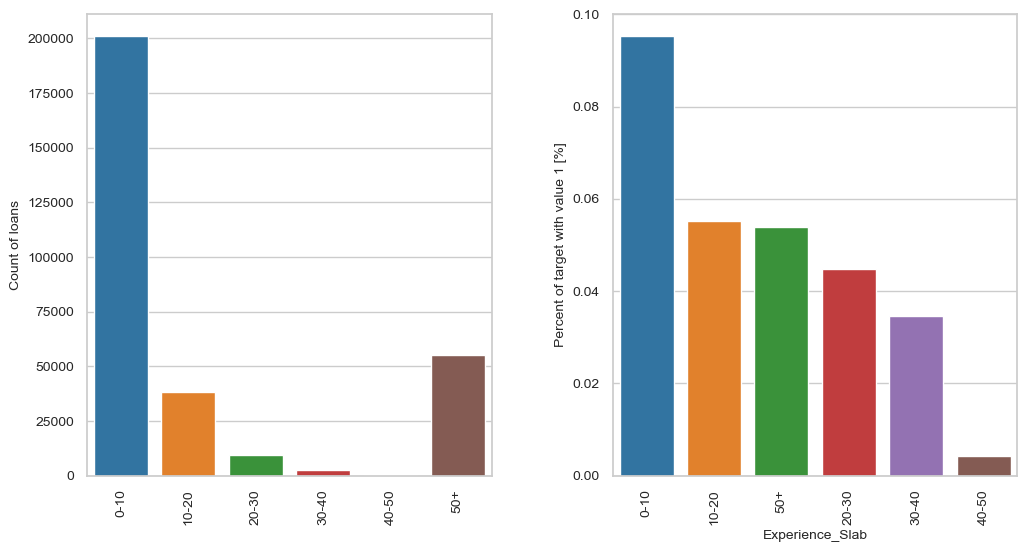

In [581]:
def plot_p_stats(feature, label_rotation=False, horizontal_layout=True):
    temp = loan_appl_data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Count of loans': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = loan_appl_data[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    plt.figure(figsize=(12, 6))
    sns.set_color_codes("pastel")

    if horizontal_layout:
        plt.subplot(1, 2, 1)
    else:
        plt.subplot(2, 1, 1)

    s1 = sns.barplot(x=feature, y="Count of loans", data=df1)
    if label_rotation:
        s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xlabel('')
    plt.ylabel('Count of loans', fontsize=10)

    if horizontal_layout:
        plt.subplot(1, 2, 2)
    else:
        plt.subplot(2, 1, 2)

    s2 = sns.barplot(x=feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if label_rotation:
        s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.xlabel(feature, fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()

# Call the function
plot_p_stats('NAME_EDUCATION_TYPE', label_rotation=True, horizontal_layout=True)
plot_p_stats('NAME_FAMILY_STATUS', label_rotation=True, horizontal_layout=True)
plot_p_stats('Applicant_AgeGroup', label_rotation=True, horizontal_layout=True)
plot_p_stats('Experience_Slab', label_rotation=True, horizontal_layout=True)

# Observations

Applicant_AgeGroup - 

The most substantial loan uptake comes from individuals aged between 30 and 40 years, with those in the 40-50, 50-60, and 20-30 age brackets following suit. Loan application appears to be absent among individuals under 20 years of age.

NAME_EDUCATION_TYPE - 

Despite having a lower likelihood of applying for loans, individuals with lower levels of education exhibit the highest default rate of around 11%. In contrast, applicants holding an Academic degree demonstrate the lowest default rate, which is below 2%.

NAME_FAMILY_STATUS -  

Among the various marital status categories, Civil marriage stands out with the highest loan default rate, showing an increase of 10%

Experience_Slab - 

Applicants within the experience bracket of 0-10 years show the highest loan default rate, at around 9.5%. Similarly, candidates with 10-20 years of experience and those aged 50 and above demonstrate nearly equivalent default rates, both approximately 5.8%. In contrast, applicants with 40-50 years of experience exhibit the lowest tendency to default on loans.

# Univariate analysis of continuos variables

# ANNUITY

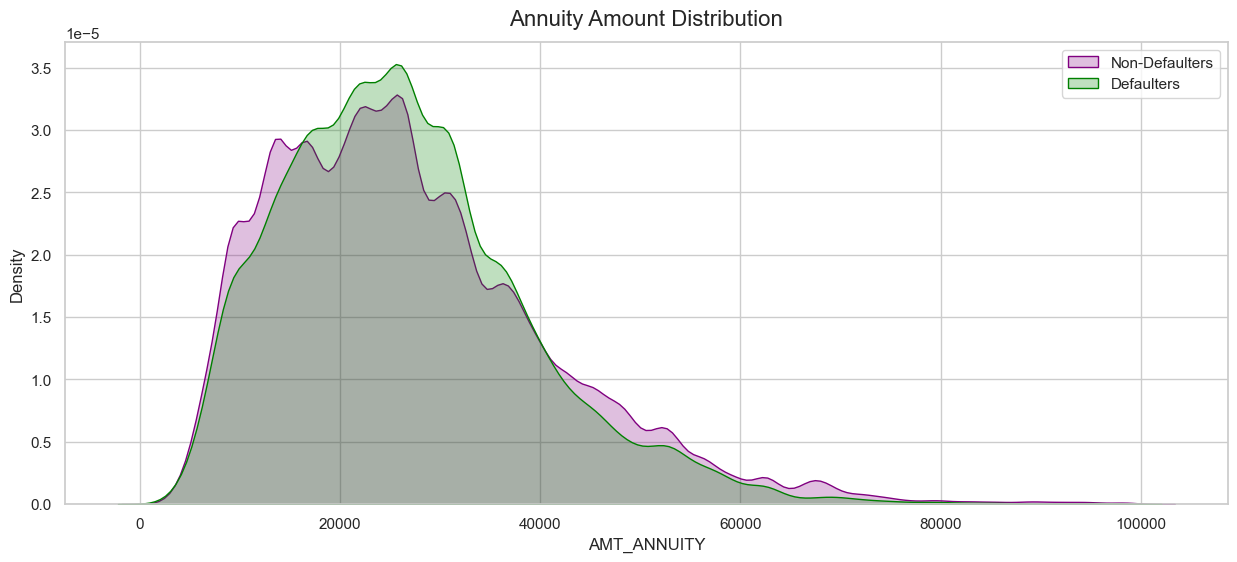

In [587]:
plt.figure(figsize=(15, 6))

sns.kdeplot(data=target_0[target_0['AMT_ANNUITY'] < 100000], x='AMT_ANNUITY', color='purple', label='Non-Defaulters', fill=True)
sns.kdeplot(data=target_1[target_1['AMT_ANNUITY'] < 100000], x='AMT_ANNUITY', color='green', label='Defaulters', fill=True)

plt.title("Annuity Amount Distribution")
plt.xlabel("AMT_ANNUITY")
plt.ylabel("Density")
plt.legend()
plt.show()

The density of Annuity Amount is nearly identical for applicants who make timely payments and those more prone to default. Nevertheless, it can be observed that defaulting applicants tend to have a higher Annuity Amount. There appears to be a tendency to default among loans falling within the range of 20,000 to 40,000 in terms of Annuity Amount.

# Correlation of continuos variable

In [590]:
corr = target_0.corr()
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr0 = corr.unstack().reset_index()
corr0.columns = ['VAR1','VAR2','Correlation']
corr0.dropna(subset=['Correlation'],inplace=True)
corr0['Correlation'] = round(corr0['Correlation'],2)
corr0['Correlation'] = corr0['Correlation'].abs()
corr0.sort_values(by='Correlation',ascending=False).head(10)

,VAR1,VAR2,Correlation
101,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
71,YEARS_EMPLOYED,YEARS_BIRTH,0.63
47,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
57,YEARS_BIRTH,CNT_CHILDREN,0.34
104,CNT_FAM_MEMBERS,YEARS_BIRTH,0.29
83,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.28
82,YEARS_ID_PUBLISH,YEARS_BIRTH,0.27
68,YEARS_EMPLOYED,CNT_CHILDREN,0.25
105,CNT_FAM_MEMBERS,YEARS_EMPLOYED,0.24
114,AGGREGATE_DOC_RESULT,AMT_ANNUITY,0.19


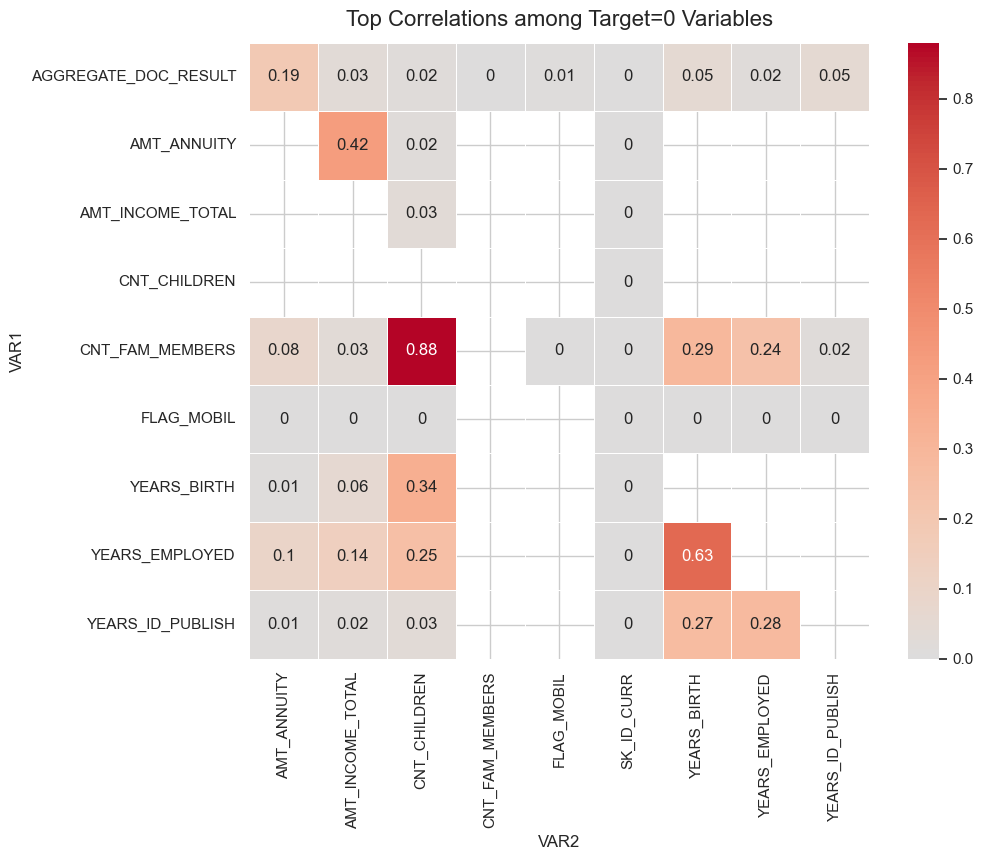

In [591]:
plt.figure(figsize=(10, 8))
heatmap_data = corr0.pivot(index='VAR1', columns='VAR2', values='Correlation')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Top Correlations among Target=0 Variables')
plt.show()

In [592]:
corr_1 = target_1.corr()
corr_1 = corr_1.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr1 = corr_1.unstack().reset_index()
corr1.columns = ['VAR1','VAR2','Correlation']
corr1.dropna(subset=['Correlation'],inplace=True)
corr1['Correlation'] = round(corr1['Correlation'],2)
corr1['Correlation'] = corr1['Correlation'].abs()
corr1.sort_values(by='Correlation',ascending=False).head(10)

,VAR1,VAR2,Correlation
101,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
71,YEARS_EMPLOYED,YEARS_BIRTH,0.58
57,YEARS_BIRTH,CNT_CHILDREN,0.26
82,YEARS_ID_PUBLISH,YEARS_BIRTH,0.25
83,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.23
104,CNT_FAM_MEMBERS,YEARS_BIRTH,0.20
114,AGGREGATE_DOC_RESULT,AMT_ANNUITY,0.20
68,YEARS_EMPLOYED,CNT_CHILDREN,0.19
105,CNT_FAM_MEMBERS,YEARS_EMPLOYED,0.19
103,CNT_FAM_MEMBERS,AMT_ANNUITY,0.08


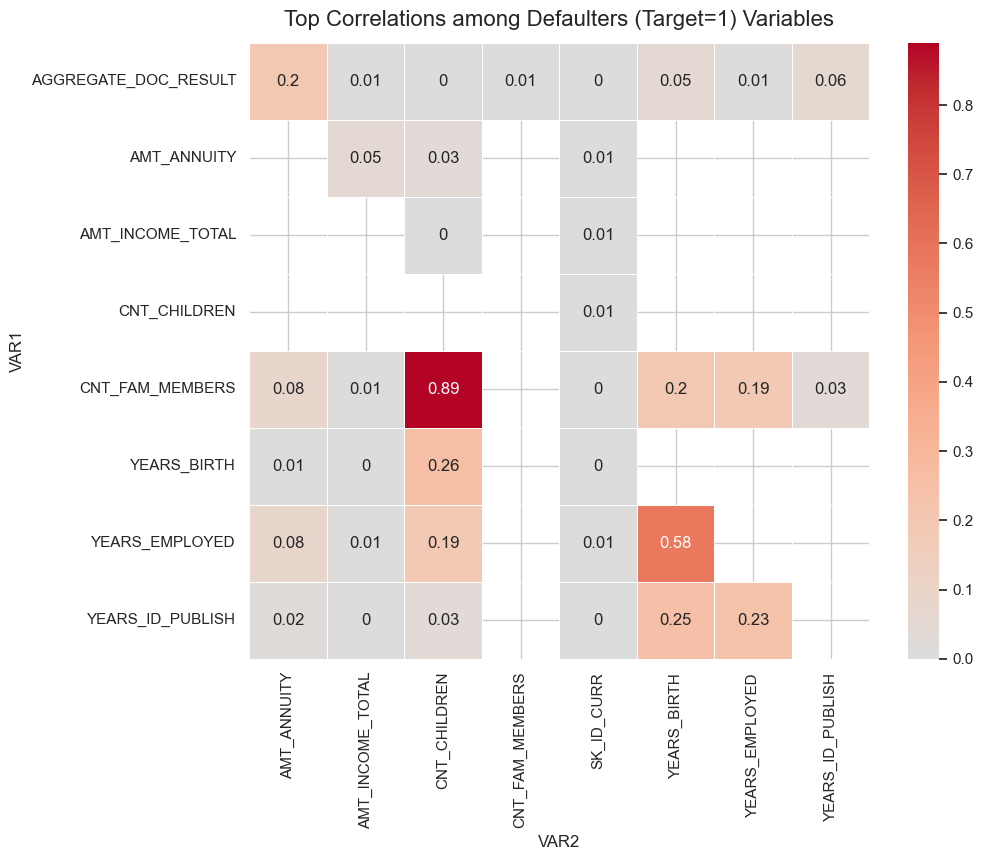

In [593]:
# Create a heatmap for 'corr1'
plt.figure(figsize=(10, 8))
heatmap_data = corr1.pivot(index='VAR1', columns='VAR2', values='Correlation')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Top Correlations among Defaulters (Target=1) Variables')
plt.show()

Evidently, among those likely to default on their loans, there exists a substantial correlation (98%) between the cost of the goods associated with the loan and the credit amount provided. Subsequently, a notable correlation is observed between the count of children a defaulter has and the overall family size.

## Bivariate analyis

Continuous vs Categorical variables

In [595]:
# Income of Applicants vs Experience Slab

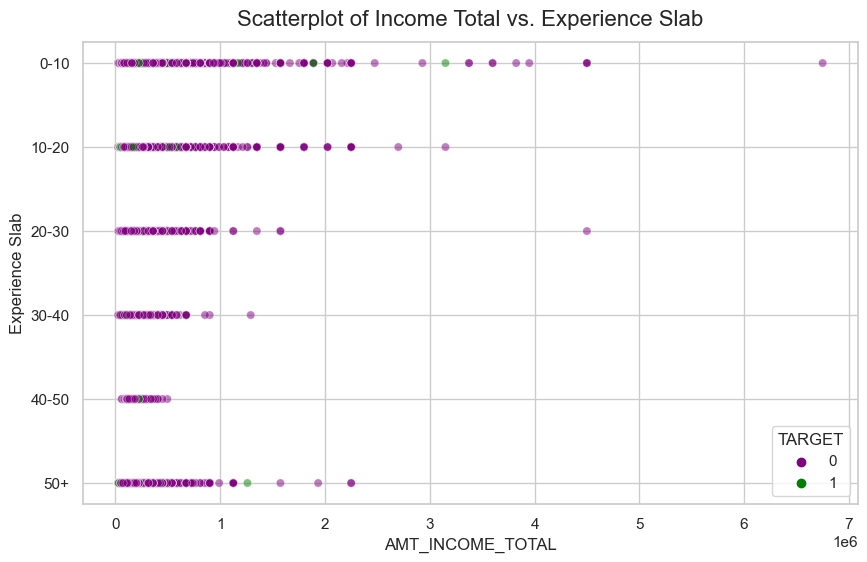

In [596]:
# Create a numerical mapping for 'Experience_Slab'
experience_mapping = {'0-10': 0, '10-20': 1, '20-30': 2, '30-40': 3, '40-50': 4, '50+': 5}
loan_appl_data['Experience_Slab_Num'] = loan_appl_data['Experience_Slab'].map(experience_mapping)

plt.figure(figsize=(10, 6))

sns.scatterplot(x='AMT_INCOME_TOTAL', y='Experience_Slab_Num', hue='TARGET', data=loan_appl_data[loan_appl_data['AMT_INCOME_TOTAL'] < 7500000], palette=['purple', 'green'], alpha=0.5)
plt.yticks(list(experience_mapping.values()), list(experience_mapping.keys()))
plt.title('Scatterplot of Income Total vs. Experience Slab')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Experience Slab')
plt.legend(title='TARGET')
plt.show()

Applicants who have 0-10 years of experience and have a total income falling within the range of 0 to 2,000,000 are more inclined to default on the loan.

# Load the previous_data

In [598]:
previous_loan_data = pd.read_csv("previous_application.csv")

In [599]:
previous_loan_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Inspection

In [600]:
previous_loan_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,774370.00,1284699.00,1670214.00,1670214.00,774370.00,5951.00,5951.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,6697.40,227847.28,12.48,1.00,0.08,0.19,0.77,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,20921.50,315396.56,3.33,0.06,0.11,0.09,0.10,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,0.03,0.37,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,0.00,50841.00,10.00,1.00,0.00,0.16,0.72,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,1638.00,112320.00,12.00,1.00,0.05,0.19,0.84,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,7740.00,234000.00,15.00,1.00,0.11,0.19,0.85,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.15,6905160.00,6905160.00,3060045.00,6905160.00,23.00,1.00,1.00,1.00,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


In [601]:
previous_loan_data.shape

(1670214, 37)

In [602]:
previous_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# Finding missing values and data treatment

In [603]:
def null_percent(x):
    return round(100*(x.isnull().sum()/len(x.index)),2)

In [604]:
null_p1 = pd.DataFrame({'Name':previous_loan_data.columns,'Null_value_percentage':null_percent(previous_loan_data)})
null_p1.set_index("Name").sort_values(by= 'Null_value_percentage',ascending=False)

,Null_value_percentage
Name,
RATE_INTEREST_PRIVILEGED,99.64
RATE_INTEREST_PRIMARY,99.64
RATE_DOWN_PAYMENT,53.64
AMT_DOWN_PAYMENT,53.64
NAME_TYPE_SUITE,49.12
NFLAG_INSURED_ON_APPROVAL,40.30
DAYS_FIRST_DRAWING,40.30
DAYS_FIRST_DUE,40.30
DAYS_LAST_DUE_1ST_VERSION,40.30


In [605]:
# Dropping values above 41

In [606]:
drop_value = list(null_p1.loc[null_p1.Null_value_percentage>=41]["Name"])
drop_value

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE']

In [607]:
previous_loan_data= previous_loan_data.drop(drop_value,axis=1)

In [608]:
null_percent(previous_loan_data).sort_values(ascending=False)

NFLAG_INSURED_ON_APPROVAL     40.30
DAYS_LAST_DUE                 40.30
DAYS_FIRST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION     40.30
DAYS_FIRST_DRAWING            40.30
DAYS_TERMINATION              40.30
AMT_GOODS_PRICE               23.08
AMT_ANNUITY                   22.29
CNT_PAYMENT                   22.29
PRODUCT_COMBINATION            0.02
NAME_GOODS_CATEGORY            0.00
NAME_YIELD_GROUP               0.00
NAME_SELLER_INDUSTRY           0.00
SELLERPLACE_AREA               0.00
CHANNEL_TYPE                   0.00
NAME_PRODUCT_TYPE              0.00
NAME_PORTFOLIO                 0.00
SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
CODE_REJECT_REASON             0.00
NAME_PAYMENT_TYPE              0.00
DAYS_DECISION                  0.00
NAME_CONTRACT_STATUS           0.00
NAME_CASH_LOAN_PURPOSE         0.00
NFLAG_LAST_APPL_IN_DAY         0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
HOUR_APPR_PROCESS_START        0.00
WEEKDAY_APPR_PROCESS_START  

In [609]:
# Now drop redundent columns

In [610]:
previous_loan_data = previous_loan_data.drop(['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA','WEEKDAY_APPR_PROCESS_START','NAME_SELLER_INDUSTRY'],axis=1)

In [611]:
previous_loan_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,1284699.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,227847.28,-880.68,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,315396.56,779.10,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,0.00,-2922.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,50841.00,-1300.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,112320.00,-581.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,234000.00,-280.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.15,6905160.00,6905160.00,6905160.00,-1.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


In [612]:
previous_loan_data.shape

(1670214, 26)

In [613]:
previous_loan_data.dtypes

SK_ID_PREV                     int64
SK_ID_CURR                     int64
NAME_CONTRACT_TYPE            object
AMT_ANNUITY                  float64
AMT_APPLICATION              float64
AMT_CREDIT                   float64
AMT_GOODS_PRICE              float64
NAME_CASH_LOAN_PURPOSE        object
NAME_CONTRACT_STATUS          object
DAYS_DECISION                  int64
NAME_PAYMENT_TYPE             object
CODE_REJECT_REASON            object
NAME_CLIENT_TYPE              object
NAME_GOODS_CATEGORY           object
NAME_PORTFOLIO                object
NAME_PRODUCT_TYPE             object
CHANNEL_TYPE                  object
CNT_PAYMENT                  float64
NAME_YIELD_GROUP              object
PRODUCT_COMBINATION           object
DAYS_FIRST_DRAWING           float64
DAYS_FIRST_DUE               float64
DAYS_LAST_DUE_1ST_VERSION    float64
DAYS_LAST_DUE                float64
DAYS_TERMINATION             float64
NFLAG_INSURED_ON_APPROVAL    float64
dtype: object

In [614]:
previous_loan_data[["DAYS_TERMINATION","DAYS_FIRST_DRAWING","DAYS_LAST_DUE","DAYS_FIRST_DUE","DAYS_DECISION","DAYS_LAST_DUE_1ST_VERSION"]] = previous_loan_data[["DAYS_TERMINATION","DAYS_FIRST_DRAWING","DAYS_LAST_DUE","DAYS_FIRST_DUE","DAYS_DECISION","DAYS_LAST_DUE_1ST_VERSION"]].astype(pd.Int64Dtype())
previous_loan_data[["CNT_PAYMENT"]] = previous_loan_data[["CNT_PAYMENT"]].astype(pd.Int64Dtype())

In [615]:
previous_loan_data.dtypes

SK_ID_PREV                     int64
SK_ID_CURR                     int64
NAME_CONTRACT_TYPE            object
AMT_ANNUITY                  float64
AMT_APPLICATION              float64
AMT_CREDIT                   float64
AMT_GOODS_PRICE              float64
NAME_CASH_LOAN_PURPOSE        object
NAME_CONTRACT_STATUS          object
DAYS_DECISION                  Int64
NAME_PAYMENT_TYPE             object
CODE_REJECT_REASON            object
NAME_CLIENT_TYPE              object
NAME_GOODS_CATEGORY           object
NAME_PORTFOLIO                object
NAME_PRODUCT_TYPE             object
CHANNEL_TYPE                  object
CNT_PAYMENT                    Int64
NAME_YIELD_GROUP              object
PRODUCT_COMBINATION           object
DAYS_FIRST_DRAWING             Int64
DAYS_FIRST_DUE                 Int64
DAYS_LAST_DUE_1ST_VERSION      Int64
DAYS_LAST_DUE                  Int64
DAYS_TERMINATION               Int64
NFLAG_INSURED_ON_APPROVAL    float64
dtype: object

# Merging both the data sets - application data and pervious application data

In [616]:
Merged_data = pd.merge(loan_appl_data, previous_loan_data, how ='left', on ='SK_ID_CURR')

In [617]:
Merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGGREGATE_DOC_RESULT,Experience_Slab,Applicant_AgeGroup,IncomeSlab,Experience_Slab_Num,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.00,400000-500000,24700.50,300000-400000,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,5.81,1,Laborers,1,Business Entity Type 3,0,0,1,0.05,0-10,20-30,Low,0,1038818.00,Consumer loans,9251.77,179055.00,179055.00,179055.00,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,24,low_normal,POS other with interest,365243,-565,125,-25,-17,0.00
1,100003,0,Cash loans,F,N,N,0,270000.00,500000 and above,35698.50,500000 and above,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0,0.05,0-10,40-50,Low,0,1810518.00,Cash loans,98356.99,900000.00,1035882.00,900000.00,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,12,low_normal,Cash X-Sell: low,365243,-716,-386,-536,-527,1.00
2,100003,0,Cash loans,F,N,N,0,270000.00,500000 and above,35698.50,500000 and above,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0,0.05,0-10,40-50,Low,0,2636178.00,Consumer loans,64567.67,337500.00,348637.50,337500.00,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,6,middle,POS industry with interest,365243,-797,-647,-647,-639,0.00
3,100003,0,Cash loans,F,N,N,0,270000.00,500000 and above,35698.50,500000 and above,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0,0.05,0-10,40-50,Low,0,2396755.00,Consumer loans,6737.31,68809.50,68053.50,68809.50,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,12,middle,POS household with interest,365243,-2310,-1980,-1980,-1976,1.00
4,100004,0,Revolving loans,M,Y,Y,0,67500.00,100000-200000,6750.00,100000-200000,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,6.93,1,Laborers,1,Government,0,0,0,0.00,0-10,50-60,Low,0,1564014.00,Consumer loans,5357.25,24282.00,20106.00,24282.00,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,4,middle,POS mobile without interest,365243,-784,-694,-724,-714,0.00


In [618]:
Merged_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY_x,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,AGGREGATE_DOC_RESULT,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1430060.00,1430060.00,1430060.00,1430060.00,1430060.00,1430060.00,1430060.00,1430060.00,1430060.00,1430060.00,1430060.00,1413608.00,1106420.00,1413608.00,1413607.00,1094114.00,1413608.00,1106425.00,852552.00,852552.00,852552.00,852552.00,852552.00,852552.00
mean,278472.86,0.09,0.40,173602.33,27042.02,44.70,198.81,8.31,1.00,2.15,0.05,1922742.86,15837.26,175246.61,196357.43,226453.02,-880.37,16.05,342259.51,13489.05,33273.12,76664.83,82351.79,0.33
std,102802.58,0.28,0.72,198336.11,14040.03,11.91,392.50,4.13,0.00,0.90,0.02,532712.54,14725.06,293626.13,319485.56,315941.00,783.54,14.57,88828.93,71650.87,106159.36,149704.14,153536.16,0.47
min,100002.00,0.00,0.00,25650.00,1615.50,20.52,0.00,0.00,0.00,1.00,0.00,1000001.00,0.00,0.00,0.00,0.00,-2922.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,189368.00,0.00,0.00,112500.00,16798.50,34.87,2.84,4.88,1.00,2.00,0.05,1461346.75,6257.87,19750.50,24880.50,49828.50,-1313.00,6.00,365243.00,-1630.00,-1244.00,-1316.00,-1269.00,0.00
50%,278960.00,0.00,0.00,157500.00,24916.50,43.94,6.56,9.12,1.00,2.00,0.05,1922696.00,11223.76,70870.50,80595.00,110245.50,-582.00,12.00,365243.00,-825.00,-358.00,-534.00,-494.00,0.00
75%,367510.25,0.00,1.00,211500.00,34573.50,54.73,17.26,11.83,1.00,3.00,0.05,2384008.25,20421.45,180000.00,215640.00,229500.00,-271.00,24.00,365243.00,-408.00,135.00,-73.00,-42.00,1.00
max,456255.00,1.00,19.00,117000000.00,258025.50,69.12,1000.67,19.72,1.00,20.00,0.20,2845381.00,418058.15,5850000.00,4509688.50,5850000.00,-1.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


In [619]:
Merged_data.shape

(1430060, 55)

In [620]:
# Univariate analysis

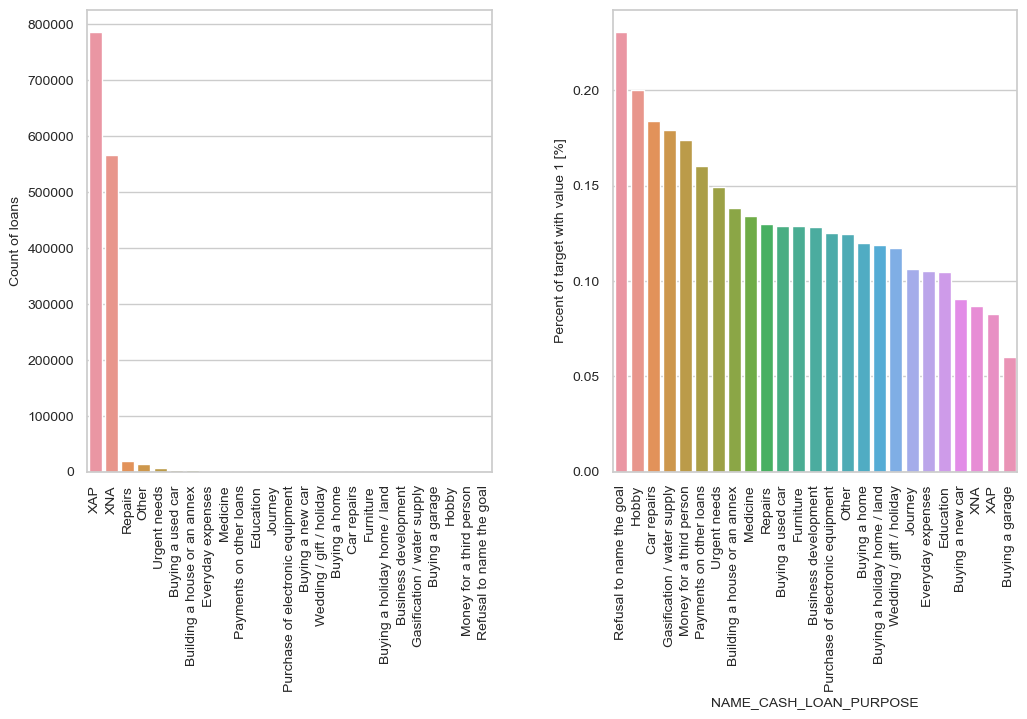

In [621]:
def plot_p_stats(feature, label_rotation=False, horizontal_layout=True):
    temp = Merged_data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Count of loans': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = Merged_data[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    plt.figure(figsize=(12, 6))
    sns.set_color_codes("pastel")

    if horizontal_layout:
        plt.subplot(1, 2, 1)
    else:
        plt.subplot(2, 1, 1)

    s1 = sns.barplot(x=feature, y="Count of loans", data=df1)
    if label_rotation:
        s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xlabel('')
    plt.ylabel('Count of loans', fontsize=10)

    if horizontal_layout:
        plt.subplot(1, 2, 2)
    else:
        plt.subplot(2, 1, 2)

    s2 = sns.barplot(x=feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if label_rotation:
        s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.xlabel(feature, fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()

# Call the function
plot_p_stats('NAME_CASH_LOAN_PURPOSE', True, True)

The highest number loan applied for is car repair, apart from refusal to name the goal and hobby. Gas or water bill, money for third person and urgent need are down the list. The highest percentage of application defaults occurs among applicants with a history of prior applications, specifically in cases where they refuse to specify their objectives.

#  Type of contract

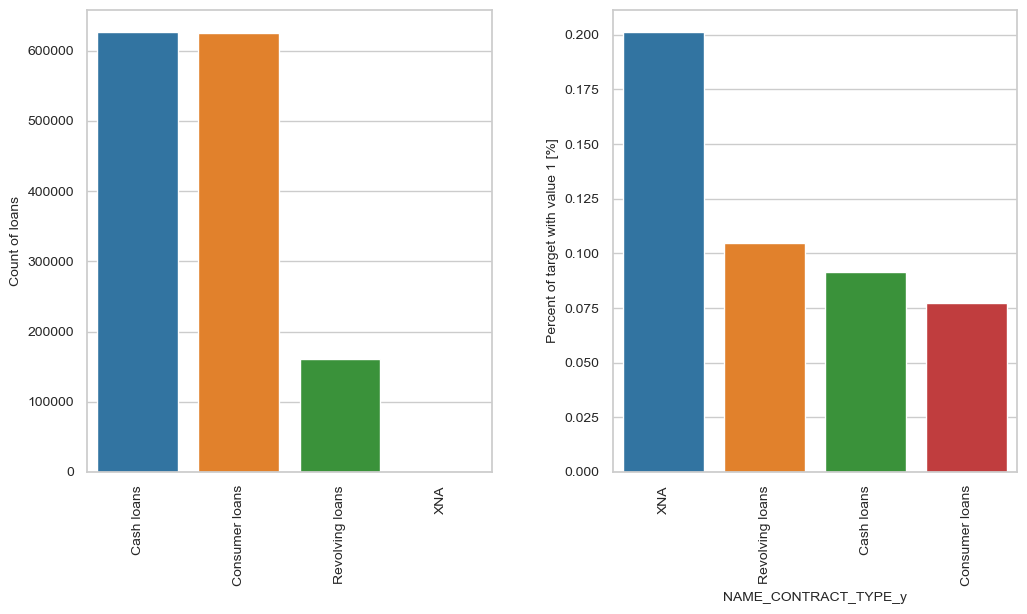

In [622]:
plot_p_stats('NAME_CONTRACT_TYPE_y',True,True)

The appliacants have equally applied for cash loans and consumer loans in the previous_loan_data set, while the revolving loan application are comparitively low. Although, the number applicants in revolving loans are less, but are highly susceptible to going default(10%), followed by cash and consumer loans.


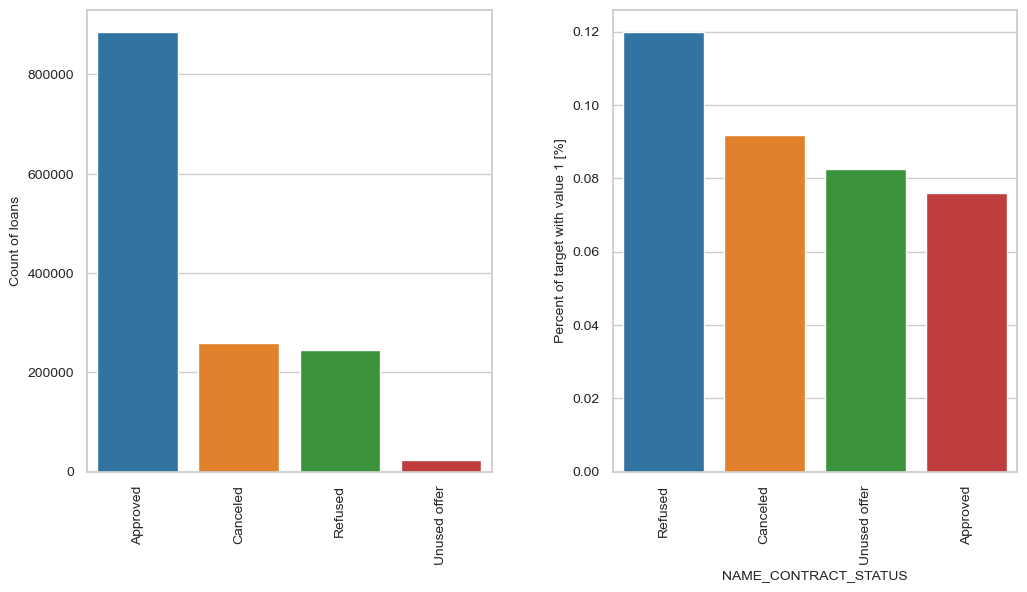

In [623]:
plot_p_stats('NAME_CONTRACT_STATUS', True, True)

The majority of prior applications have been accepted (around 840,000), with canceled and rejected applications (approximately 235,000) following behind. A minimal number, around 20,000, are labeled as "Unused offers."

Regarding current applications, individuals with a history of prior applications exhibit the highest default rate when their historical contract statuses indicate a rejection (12%). This is trailed by cancellations (9%), unused offers (arround 8%), and the lowest default rate is associated with approved applications (below 8%).

# Client Type

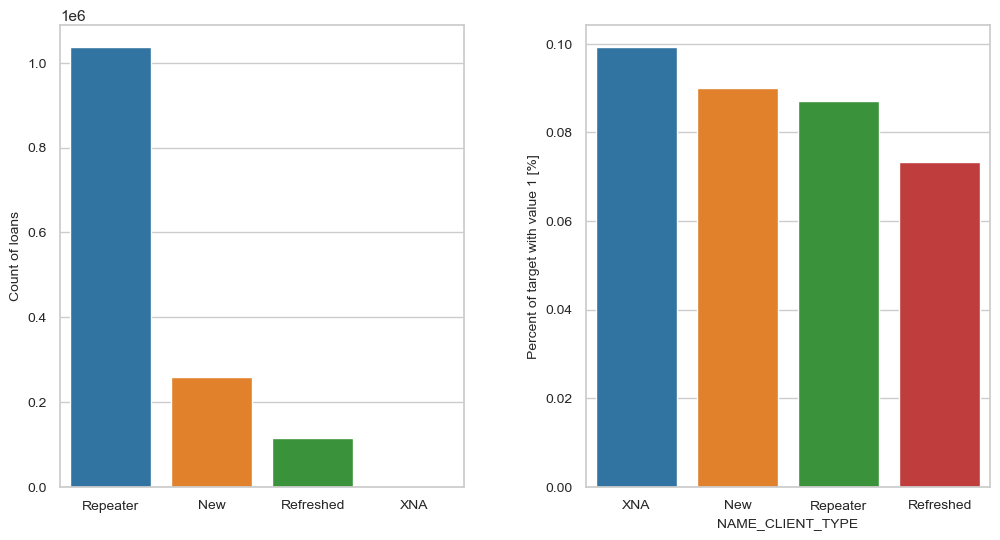

In [624]:
plot_p_stats('NAME_CLIENT_TYPE')

Around 1.15M are repeater client type in the previous application data set. Around 220k are new loan applicants, while around 100k are refreshed client type. Regarding the default percentages for present applications among clients who possess a record of past applications, these clients display default rates of 8.5%, 8.25%, and 7% in relation to their previous client classifications as New, Repeater, and Refreshed, respectively.

# Bivariate analysis

In [625]:
Merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGGREGATE_DOC_RESULT,Experience_Slab,Applicant_AgeGroup,IncomeSlab,Experience_Slab_Num,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.00,400000-500000,24700.50,300000-400000,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,5.81,1,Laborers,1,Business Entity Type 3,0,0,1,0.05,0-10,20-30,Low,0,1038818.00,Consumer loans,9251.77,179055.00,179055.00,179055.00,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,24,low_normal,POS other with interest,365243,-565,125,-25,-17,0.00
1,100003,0,Cash loans,F,N,N,0,270000.00,500000 and above,35698.50,500000 and above,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0,0.05,0-10,40-50,Low,0,1810518.00,Cash loans,98356.99,900000.00,1035882.00,900000.00,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,12,low_normal,Cash X-Sell: low,365243,-716,-386,-536,-527,1.00
2,100003,0,Cash loans,F,N,N,0,270000.00,500000 and above,35698.50,500000 and above,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0,0.05,0-10,40-50,Low,0,2636178.00,Consumer loans,64567.67,337500.00,348637.50,337500.00,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,6,middle,POS industry with interest,365243,-797,-647,-647,-639,0.00
3,100003,0,Cash loans,F,N,N,0,270000.00,500000 and above,35698.50,500000 and above,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0,0.05,0-10,40-50,Low,0,2396755.00,Consumer loans,6737.31,68809.50,68053.50,68809.50,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,12,middle,POS household with interest,365243,-2310,-1980,-1980,-1976,1.00
4,100004,0,Revolving loans,M,Y,Y,0,67500.00,100000-200000,6750.00,100000-200000,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,6.93,1,Laborers,1,Government,0,0,0,0.00,0-10,50-60,Low,0,1564014.00,Consumer loans,5357.25,24282.00,20106.00,24282.00,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,4,middle,POS mobile without interest,365243,-784,-694,-724,-714,0.00


In [626]:
# Categorical and Categorical analysis

In [627]:
# Defaulters vs Refused

In [628]:
d0=Merged_data.loc[Merged_data["TARGET"]==0]
d1=Merged_data.loc[Merged_data["TARGET"]==1]

In [629]:
print(len(d0))
d2 = d0["NAME_CONTRACT_STATUS"].value_counts()
d2

1306720


Approved        818810
Canceled        235612
Refused         215935
Unused offer     20891
Name: NAME_CONTRACT_STATUS, dtype: int64

In [630]:
print(len(d0))
d2 = d0["NAME_CONTRACT_STATUS"].value_counts()
d2

1306720


Approved        818810
Canceled        235612
Refused         215935
Unused offer     20891
Name: NAME_CONTRACT_STATUS, dtype: int64

In [631]:
percentage_d0 = (d2["Refused"] / len(d0)) * 100
percentage_d1 = (d3["Refused"] / len(d1)) * 100

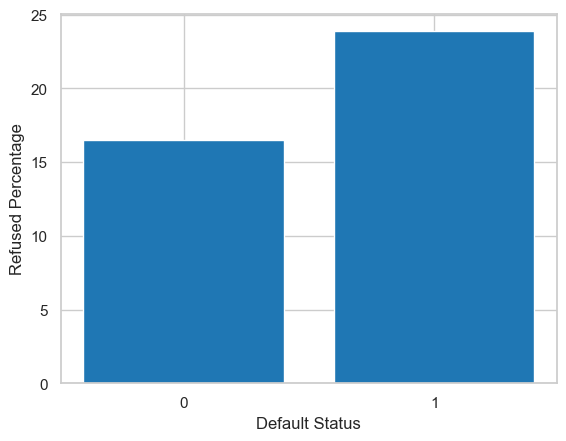

In [632]:
plt.bar(["0", "1"], [percentage_d0, percentage_d1])
plt.xlabel("Default Status")
plt.ylabel("Refused Percentage")
plt.show()

Individuals who have a history of frequently defaulting on loan payments are more prone to experiencing loan refusals in the future.

# Categorical vs Continuous

In [633]:
# Days Last Due vs People who are more likely to default on the loan

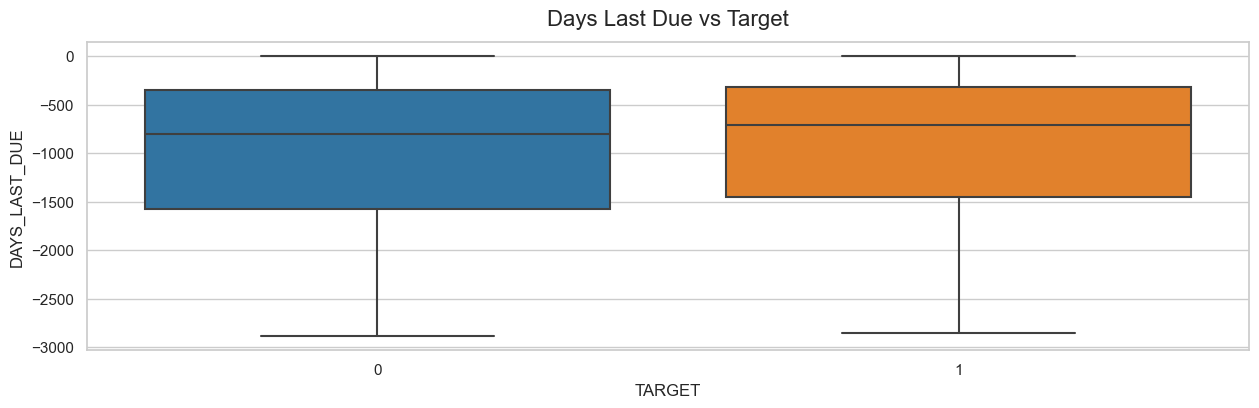

In [634]:
plt.figure(figsize=[15, 4])
sns.boxplot(y=Merged_data[Merged_data['DAYS_LAST_DUE'] < 150000]['DAYS_LAST_DUE'], x='TARGET', data=Merged_data)
plt.title("Days Last Due vs Target")
plt.show()

Days Last Due for applicants who returened the loan on time and the one who defaulted are somewhat similar, although the last due date applicants are little bit low than the ones who defaulted.

In [635]:
# Client statues and client type

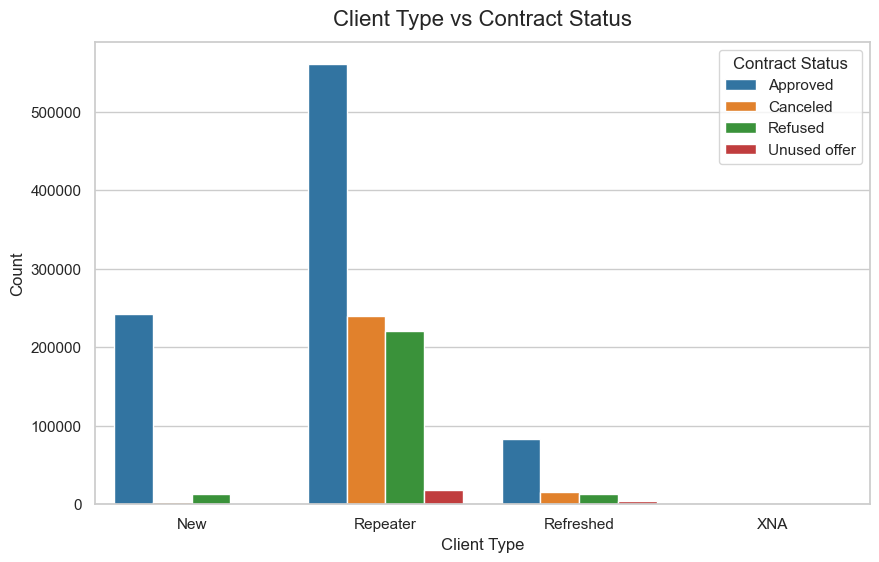

In [636]:
plt.figure(figsize=[10, 6])
sns.countplot(x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_STATUS', data=Merged_data)
plt.title("Client Type vs Contract Status")
plt.xlabel("Client Type")
plt.ylabel("Count")
plt.legend(title="Contract Status")
plt.show()

From the above graph it is apparent that the existing customers have a much higher chance of getting loan approved than the new ones.

# Observation

First we performed basic functions to set our data, then we used a variety of techniques to clean our data before fining outliers and treting the same

Then we used univariate analysis to find certain pattern in the data set, that is what are the insights we can get from the data

# Observations from Univariate analysis


IncomeSlab:
-People in low income range have high number of loan and also have high in defaulter
-Income segment very high has less defaulter.

CODE_GENDER:
-The % of defaulters are more in Male than Female

NAME_INCOME_TYPE:
- Student and business are higher in percentage of loan repayment.
- Working, State servent and Commercial associates are higher in default percentage.
- Maternity category is significantly higher problem in repayment.

NAME_CONTRACT_TYPE:
- For contract type ‘Cash loans’ are high in number of credits than ‘Revolving loans’ contract type.
- By above graph 'Revolving loans' is small amount compared to ‘Cash loans’ 

Applicants who possess a Secondary Education are the most numerous in terms of loan uptake, surpassing 200,000 loans. Following closely are those with Higher Education. Conversely, candidates holding an Academic Degree represent the smallest fraction of loan applicants. Despite their relatively lower frequency in loan applications, individuals with lower educational backgrounds have the highest default rate, reaching around 11%. In contrast, applicants with an Academic Degree exhibit the lowest default rate, which is less than 2%.

Applicant_AgeGroup -

The most substantial loan uptake comes from individuals aged between 30 and 40 years, with those in the 40-50, 50-60, and 20-30 age brackets following suit. Loan application appears to be absent among individuals under 20 years of age.

NAME_EDUCATION_TYPE -

Despite having a lower likelihood of applying for loans, individuals with lower levels of education exhibit the highest default rate of around 11%. In contrast, applicants holding an Academic degree demonstrate the lowest default rate, which is below 2%.

NAME_FAMILY_STATUS -

Among the various marital status categories, Civil marriage stands out with the highest loan default rate, showing an increase of 10%

Experience_Slab -

Applicants within the experience bracket of 0-10 years show the highest loan default rate, at around 9.5%. Similarly, candidates with 10-20 years of experience and those aged 50 and above demonstrate nearly equivalent default rates, both approximately 5.8%. In contrast, applicants with 40-50 years of experience exhibit the lowest tendency to default on loans.

### Univariate analysis of Annuity

The density of Annuity Amount is nearly identical for applicants who make timely payments and those more prone to default. Nevertheless, it can be observed that defaulting applicants tend to have a higher Annuity Amount. There appears to be a tendency to default among loans falling within the range of 20,000 to 40,000 in terms of Annuity Amount.

Correlation between VAR1 AND VAR2 -

Evidently, among those likely to default on their loans, there exists a substantial correlation (98%) between the cost of the goods associated with the loan and the credit amount provided. Subsequently, a notable correlation is observed between the count of children a defaulter has and the overall family size.

## Bivariate analysis

Income of Applicants vs Experience Slab - 

Applicants who have 0-10 years of experience and have a total income falling within the range of 0 to 2,000,000 are more inclined to default on the loan.

## After merging our data sets

NAME_CASH_LOAN_PURPOSE -

The highest number loan applied for is car repair, apart from refusal to name the goal and hobby. Gas or water bill, money for third person and urgent need are down the list. The highest percentage of application defaults occurs among applicants with a history of prior applications, specifically in cases where they refuse to specify their objectives.


Type of contract - 

The appliacants have equally applied for cash loans and consumer loans in the previous_loan_data set, while the revolving loan application are comparitively low. Although, the number applicants in revolving loans are less, but are highly susceptible to going default(10%), followed by cash and consumer loans.

NAME_CONTRACT_STATUS - 

The majority of prior applications have been accepted (around 840,000), with canceled and rejected applications (approximately 235,000) following behind. A minimal number, around 20,000, are labeled as "Unused offers."
Regarding current applications, individuals with a history of prior applications exhibit the highest default rate when their historical contract statuses indicate a rejection (12%). This is trailed by cancellations (9%), unused offers (arround 8%), and the lowest default rate is associated with approved applications (below 8%).

Client Type - 

Around 1.15M are repeater client type in the previous application data set. Around 220k are new loan applicants, while around 100k are refreshed client type. Regarding the default percentages for present applications among clients who possess a record of past applications, these clients display default rates of 8.5%, 8.25%, and 7% in relation to their previous client classifications as New, Repeater, and Refreshed, respectively.

# Conclusion:

Bivariate analysis of merged data sets: 

Here is the main objective of our project, which is to find how many loans will get approved, cancelled, refused or unused offer

Approved  -  818810

Canceled  -  235612

Refused   -   215935

Unused offer -  20891